<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/10_aggregation_groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementamos nuestro entorno

## Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/'
!ls

/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db
london_merged.csv  Meteorite_Landings.csv  notas.csv  population-worldbank


In [8]:
def path_file(name_file):
  return '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/{0}'.format(name_file)

## Importamos algunas librerías

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.1.5'

## Arreglamos los formatos de impresión

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
np.set_printoptions(precision=2)

# Empezamos a trabajar

In [14]:
path_file_read = path_file('notas.csv')
path_file_read

'/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/notas.csv'

In [16]:
df = pd.read_csv(path_file_read, sep = '|')
df.head()

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.00,7
1,9,110,mx,F,10.00,9
2,13,130,co,F,8.00,9
3,14,155,mx,M,nan,8
4,12,125,mx,M,7.00,8


In [25]:
df_2 = df[['genero', 'edad']]
df_2.groupby(by = 'genero', as_index = False).mean()

,genero,edad
0,F,11.33
1,M,11.75


In [26]:
df.corr()

,edad,cm,Q1,Q2
edad,1.00,0.91,-0.32,0.11
cm,0.91,1.00,-0.32,-0.02
Q1,-0.32,-0.32,1.00,0.23
Q2,0.11,-0.02,0.23,1.00


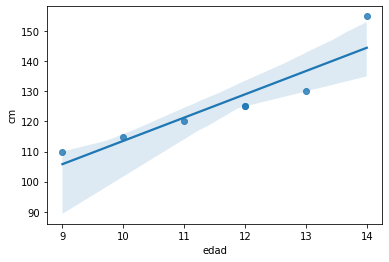

In [27]:
sn.regplot(x = 'edad', y = 'cm', data = df)

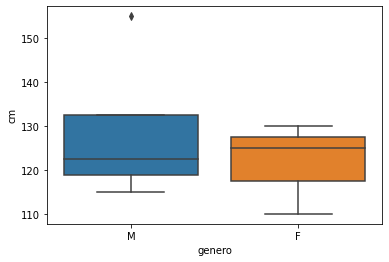

In [28]:
sn.boxplot(x = 'genero', y = 'cm', data = df)

# Ahora si trabajos con una base de datos mejor

In [29]:
# traemos desde seaborn una base de datos de diamantes
df = sn.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [35]:
# agruparemos nuestros datos por la variable de corte(cut)

df.groupby(by = 'cut', as_index=True).mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.70,61.71,55.95,"3,457.54",5.51,5.52,3.40
Premium,0.89,61.26,58.75,"4,584.26",5.97,5.94,3.65
Very Good,0.81,61.82,57.96,"3,981.76",5.74,5.77,3.56
Good,0.85,62.37,58.69,"3,928.86",5.84,5.85,3.64
Fair,1.05,64.04,59.05,"4,358.76",6.25,6.18,3.98


In [38]:
# median() = es un estimador mucho más preciso
df.groupby('cut', as_index = True).median()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.54,61.80,56.00,"1,810.00",5.25,5.26,3.23
Premium,0.86,61.40,59.00,"3,185.00",6.11,6.06,3.72
Very Good,0.71,62.10,58.00,"2,648.00",5.74,5.77,3.56
Good,0.82,63.40,58.00,"3,050.50",5.98,5.99,3.70
Fair,1.00,65.00,58.00,"3,282.00",6.17,6.10,3.97


In [40]:
df.groupby('cut')['carat'].count().to_frame()

,carat
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [41]:
df.groupby(by='cut')['carat'].max().to_frame()

,carat
cut,
Ideal,3.50
Premium,4.01
Very Good,4.00
Good,3.01
Fair,5.01


In [42]:
df.groupby(by='cut')['carat'].min().to_frame()

,carat
cut,
Ideal,0.20
Premium,0.20
Very Good,0.20
Good,0.23
Fair,0.22


In [43]:
 for i in [0,1,2,3]:
   print(i)

0
1
2
3


In [46]:
for key_group, group in df.groupby('cut'):
  grouped_price = group['price'].mean()

  print('Cut: {}, Price: {}\n'.format(key_group, grouped_price))

Cut: Ideal, Price: 3457.541970210199

Cut: Premium, Price: 4584.2577042999055

Cut: Very Good, Price: 3981.7598907465654

Cut: Good, Price: 3928.864451691806

Cut: Fair, Price: 4358.757763975155



In [47]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


In [49]:
df.groupby(['cut', 'color'])['price'].mean().to_frame()

price
cut       color         
Ideal     D     2,629.09
          E     2,597.55
          F     3,374.94
          G     3,720.71
          H     3,889.33
          I     4,451.97
          J     4,918.19
Premium   D     3,631.29
          E     3,538.91
          F     4,324.89
          G     4,500.74
          H     5,216.71
          I     5,946.18
          J     6,294.59
Very Good D     3,470.47
          E     3,214.65
          F     3,778.82
          G     3,872.75
          H     4,535.39
          I     5,255.88
          J     5,103.51
Good      D     3,405.38
          E     3,423.64
          F     3,495.75
          G     4,123.48
          H     4,276.25
          I     5,078.53
          J     4,574.17
Fair      D     4,291.06
          E     3,682.31
          F     3,827.00
          G     4,239.25
          H     5,135.68
          I     4,685.45
          J     4,975.66

In [51]:
df.groupby(['cut', 'color'])['price'].aggregate(['min', np.mean, max])

min     mean    max
cut       color                     
Ideal     D      367 2,629.09  18693
          E      326 2,597.55  18729
          F      408 3,374.94  18780
          G      361 3,720.71  18806
          H      357 3,889.33  18760
          I      348 4,451.97  18779
          J      340 4,918.19  18508
Premium   D      367 3,631.29  18575
          E      326 3,538.91  18477
          F      342 4,324.89  18791
          G      382 4,500.74  18741
          H      368 5,216.71  18795
          I      334 5,946.18  18823
          J      363 6,294.59  18710
Very Good D      357 3,470.47  18542
          E      352 3,214.65  18731
          F      357 3,778.82  18777
          G      354 3,872.75  18818
          H      337 4,535.39  18803
          I      336 5,255.88  18500
          J      336 5,103.51  18430
Good      D      361 3,405.38  18468
          E      327 3,423.64  18236
          F      357 3,495.75  18686
          G      394 4,123.48  18788
          H      368 4,276.25  18640
          I      351 5,078.53  18707
          J      335 4,574.17  18325
Fair      D      536 4,291.06  16386
          E      337 3,682.31  15584
          F      496 3,827.00  17995
          G      369 4,239.25  18574
          H      659 5,135.68  18565
          I      735 4,685.45  18242
          J      416 4,975.66  18531

In [52]:
def mean_kilo(x):
  return np.mean(x)/1000

In [55]:
df.groupby(['cut', 'color'])['price'].aggregate([min, np.mean, max, mean_kilo]).head()

min     mean    max  mean_kilo
cut   color                                
Ideal D      367 2,629.09  18693       2.63
      E      326 2,597.55  18729       2.60
      F      408 3,374.94  18780       3.37
      G      361 3,720.71  18806       3.72
      H      357 3,889.33  18760       3.89

In [58]:
# creamos un diccionario
dict_agg = {'carat': [min, max], 'price': [np.mean, mean_kilo]}
dict_agg

{'carat': [<function min>, <function max>],
 'price': [<function numpy.mean>, <function __main__.mean_kilo>]}

In [59]:
df.groupby(['cut', 'color']).aggregate(dict_agg)

carat         price          
                  min  max     mean mean_kilo
cut       color                              
Ideal     D      0.20 2.75 2,629.09      2.63
          E      0.20 2.28 2,597.55      2.60
          F      0.23 2.45 3,374.94      3.37
          G      0.23 2.54 3,720.71      3.72
          H      0.23 3.50 3,889.33      3.89
          I      0.23 3.22 4,451.97      4.45
          J      0.23 3.01 4,918.19      4.92
Premium   D      0.20 2.57 3,631.29      3.63
          E      0.20 3.05 3,538.91      3.54
          F      0.20 3.01 4,324.89      4.32
          G      0.23 3.01 4,500.74      4.50
          H      0.23 3.24 5,216.71      5.22
          I      0.23 4.01 5,946.18      5.95
          J      0.30 4.01 6,294.59      6.29
Very Good D      0.23 2.58 3,470.47      3.47
          E      0.20 2.51 3,214.65      3.21
          F      0.23 2.48 3,778.82      3.78
          G      0.23 2.52 3,872.75      3.87
          H      0.23 3.00 4,535.39      4.54
          I      0.24 4.00 5,255.88      5.26
          J      0.24 2.74 5,103.51      5.10
Good      D      0.23 2.04 3,405.38      3.41
          E      0.23 3.00 3,423.64      3.42
          F      0.23 2.67 3,495.75      3.50
          G      0.23 2.80 4,123.48      4.12
          H      0.25 3.01 4,276.25      4.28
          I      0.30 3.01 5,078.53      5.08
          J      0.28 3.00 4,574.17      4.57
Fair      D      0.25 3.40 4,291.06      4.29
          E      0.22 2.04 3,682.31      3.68
          F      0.25 2.58 3,827.00      3.83
          G      0.23 2.60 4,239.25      4.24
          H      0.33 4.13 5,135.68      5.14
          I      0.41 3.02 4,685.45      4.69
          J      0.30 5.01 4,975.66      4.98

## Creamos filtros

In [61]:
def f_filter(x):
  return mean_kilo(x['price']) > 4

In [62]:
df.groupby('cut').filter(f_filter)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.10,61.00,337,3.87,3.78,2.49
12,0.22,Premium,F,SI1,60.40,61.00,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.20,62.00,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.40,58.00,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.50,55.00,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.80,62.00,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.70,59.00,2757,5.69,5.73,3.58


In [64]:
# aquí quiere decir que Premium y Fair son los que tienen mas costo
# para los diamantes
df.groupby('cut').filter(f_filter)['cut'].unique()

['Premium', 'Fair']
Categories (2, object): ['Premium', 'Fair']